In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  classification_report,  ConfusionMatrixDisplay
from matplotlib.pylab import rcParams
#!pip install liac-arff
import arff

In [3]:
df = pd.read_csv('preprocessed/df.csv')
numeric = df.select_dtypes(include=np.number)
categorical = df.select_dtypes(exclude=np.number)

# Missing values

## Identification of missing data

Categorical

In [4]:
def print_range_of_values(dataframe):
    for col in dataframe.columns:
        print(col, '\t',dataframe[col].unique())

print_range_of_values(categorical)

rbc 	 [nan 'normal' 'abnormal']
pc 	 ['normal' 'abnormal' nan]
pcc 	 ['notpresent' 'present' nan]
ba 	 ['notpresent' 'present' nan]
htn 	 ['yes' 'no' nan]
dm 	 ['yes' 'no' nan]
cad 	 ['no' 'yes' nan]
appet 	 ['good' 'poor' nan]
pe 	 ['no' 'yes' nan]
ane 	 ['no' 'yes' nan]
class 	 ['ckd' 'notckd']


Numeric

In [6]:
for c in numeric.columns:
    # Check missing values
    missing_vals = []
    for p in df[c]:
        try: float(p)
        except ValueError:
            missing_vals += [p]
    print(f'Missing values for "{c}":', np.unique(missing_vals))

    # Replace missing values with NaNs
    isMissing = np.in1d(df[c], missing_vals)
    df[c][isMissing] = np.nan
    df[c] = df[c].astype(float)


Missing values for "age": []
Missing values for "bp": []
Missing values for "sg": []
Missing values for "al": []
Missing values for "su": []
Missing values for "bgr": []
Missing values for "bu": []
Missing values for "sc": []
Missing values for "sod": []
Missing values for "pot": []
Missing values for "hemo": []
Missing values for "pcv": []
Missing values for "wbcc": []
Missing values for "rbcc": []


/var/folders/vm/fytkb5cj61z52wrzzwx9_gn00000gn/T/ipykernel_41309/2206696953.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c][isMissing] = np.nan


Nr of none values

In [7]:
def get_nr_none(dataframe):
    cols = []
    for col in dataframe.columns:
        total = len(df)
        none = np.count_nonzero(dataframe[col].isnull().values)
        ratio = none/total
        cols.append((col, total, none, ratio))
    return sorted(cols, key=lambda tup: tup[3], reverse=True)

def print_nr_none(dataframe):
    nr_none = get_nr_none(dataframe)
    print('column \t total \t none \t ratio')
    for col, total, none, ratio in nr_none:
        print(col, '\t', total, '\t', none, '\t', ratio)

In [8]:
print_nr_none(df)

column 	 total 	 none 	 ratio
rbc 	 349 	 149 	 0.4269340974212034
rbcc 	 349 	 131 	 0.3753581661891118
wbcc 	 349 	 106 	 0.3037249283667622
pot 	 349 	 87 	 0.2492836676217765
sod 	 349 	 86 	 0.24641833810888253
pcv 	 349 	 70 	 0.20057306590257878
pc 	 349 	 62 	 0.17765042979942694
hemo 	 349 	 51 	 0.14613180515759314
su 	 349 	 49 	 0.14040114613180515
sg 	 349 	 47 	 0.1346704871060172
al 	 349 	 46 	 0.1318051575931232
bgr 	 349 	 43 	 0.12320916905444126
bu 	 349 	 18 	 0.05157593123209169
sc 	 349 	 17 	 0.04871060171919771
bp 	 349 	 12 	 0.034383954154727794
age 	 349 	 9 	 0.025787965616045846
pcc 	 349 	 4 	 0.011461318051575931
ba 	 349 	 4 	 0.011461318051575931
htn 	 349 	 2 	 0.0057306590257879654
dm 	 349 	 2 	 0.0057306590257879654
cad 	 349 	 2 	 0.0057306590257879654
appet 	 349 	 1 	 0.0028653295128939827
pe 	 349 	 1 	 0.0028653295128939827
ane 	 349 	 1 	 0.0028653295128939827
class 	 349 	 0 	 0.0


#### Summary
- rbc (red blood cells [normal / abnormal]) has a missing value ratio of 43%
- rbcc (red blood cell count (numerical)) has a missing value ratio of 38%
- wbcc (white blood cell count) has a missing value ratio of 30%
- pot, sod, pcv have missing value ratios between 20% and 25%
- pc, hemo, su, sg, al, bgr have missing value ratios between 10% and 20%
- the rest have a missing value ratio of less than 6%.  

## Removing NaN and None values by imputation
Due to the high dimensionaltiy of our data, a visualization of the missing values and its impact on the dataset to find out the missing value mechanism is not feasible.

To find out whether the missing values in this data set are MNAR, we would need to have measurements of some of the missing values. Since that is out of scope for our project, we assume that they are at least MAR. To be sure to have as little bias as possible, we will use multiple imputation methods to impute the missing values. We will use the mice package for this.

### Numeric

In [9]:

import statsmodels 
from statsmodels.imputation import mice

imp = mice.MICEData(numeric)
imp.update_all(200)
numeric_imputed = imp.data
print_nr_none(numeric_imputed)


column 	 total 	 none 	 ratio
age 	 349 	 0 	 0.0
bp 	 349 	 0 	 0.0
sg 	 349 	 0 	 0.0
al 	 349 	 0 	 0.0
su 	 349 	 0 	 0.0
bgr 	 349 	 0 	 0.0
bu 	 349 	 0 	 0.0
sc 	 349 	 0 	 0.0
sod 	 349 	 0 	 0.0
pot 	 349 	 0 	 0.0
hemo 	 349 	 0 	 0.0
pcv 	 349 	 0 	 0.0
wbcc 	 349 	 0 	 0.0
rbcc 	 349 	 0 	 0.0


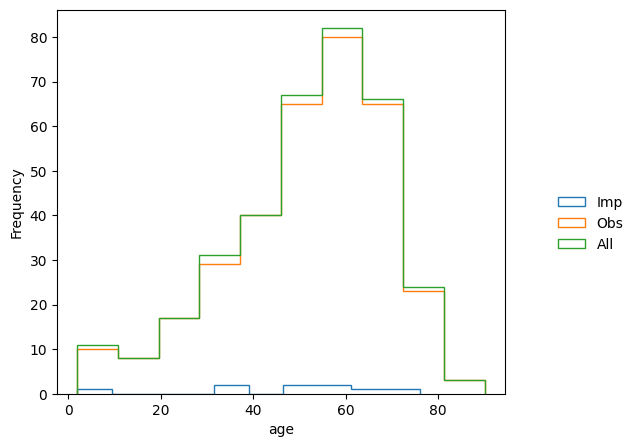

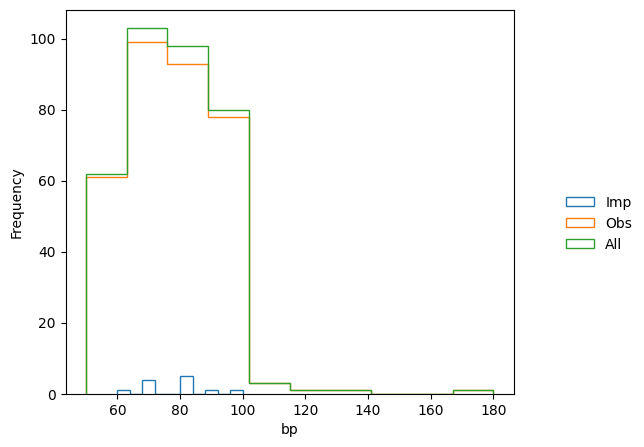

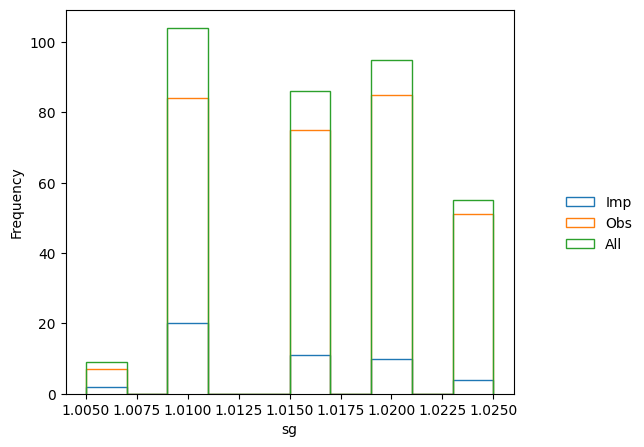

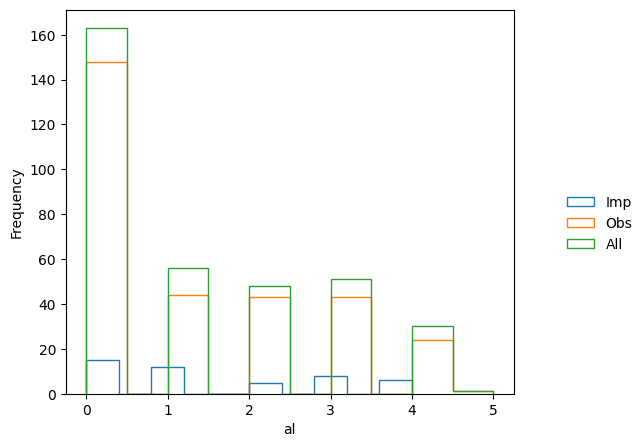

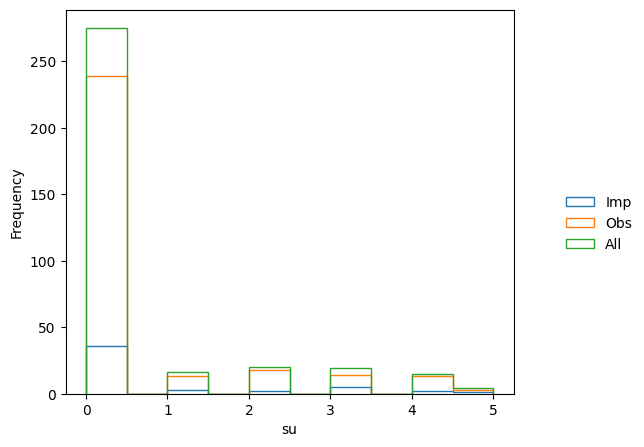

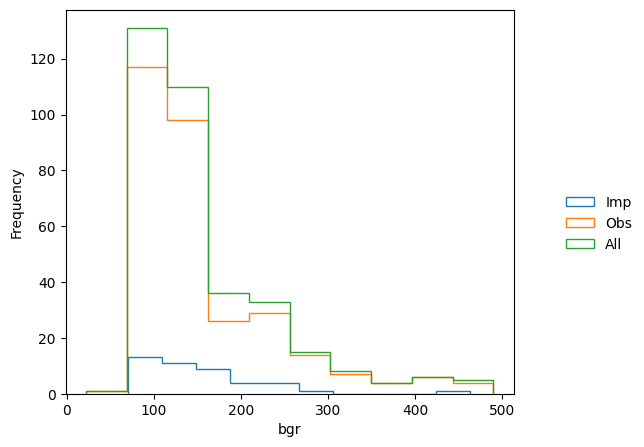

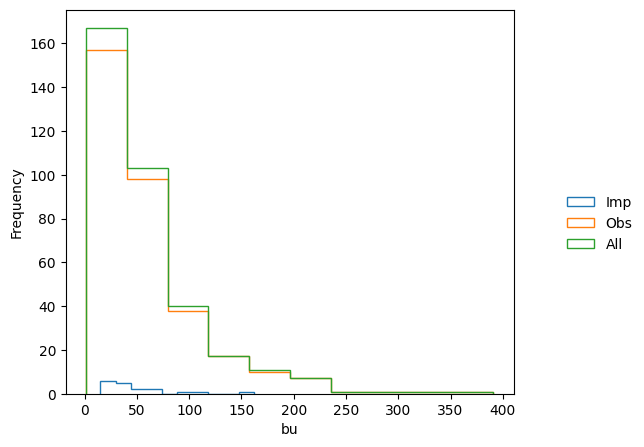

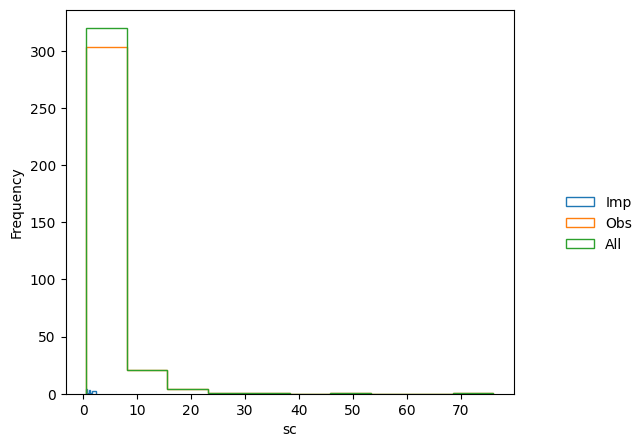

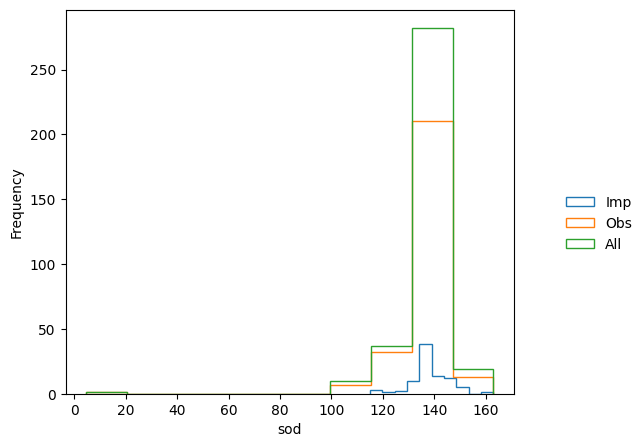

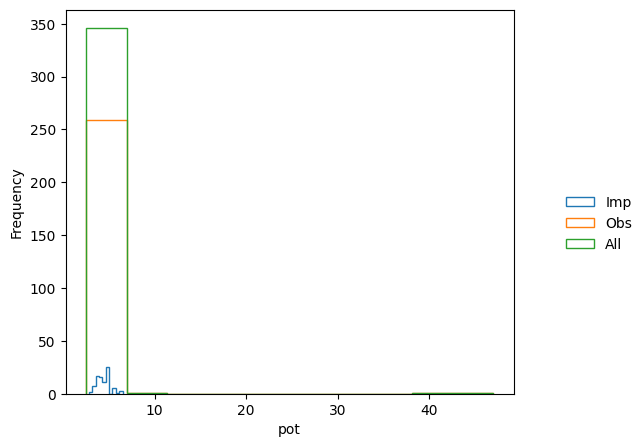

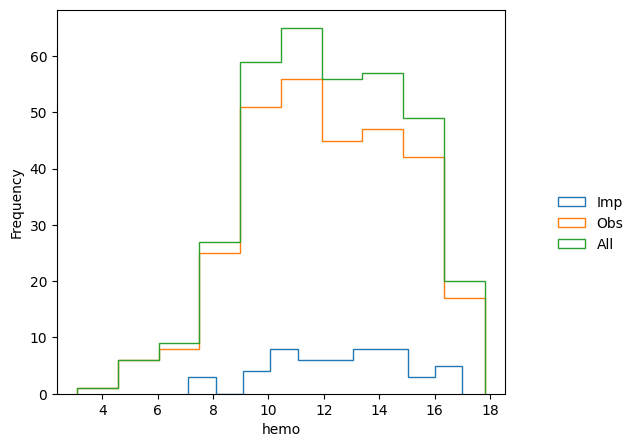

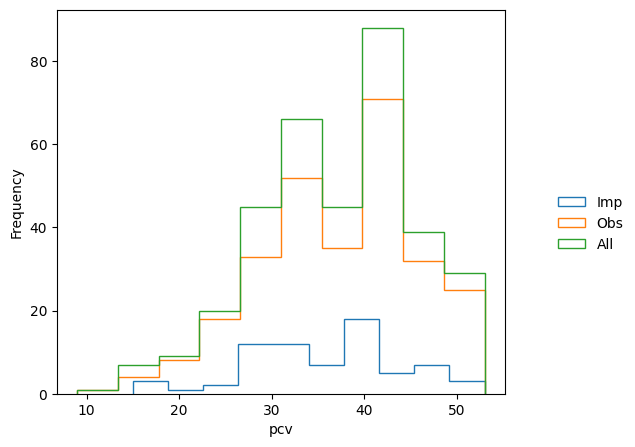

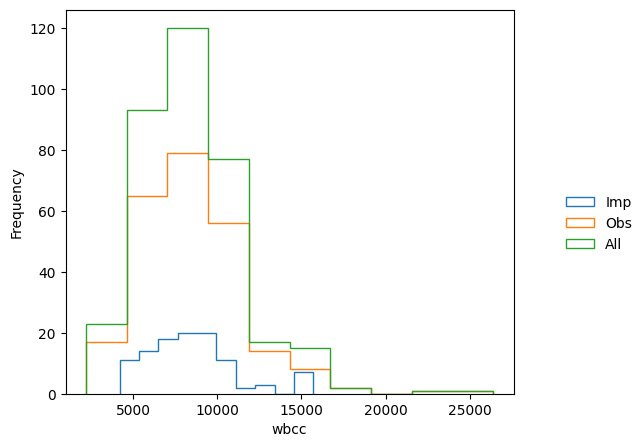

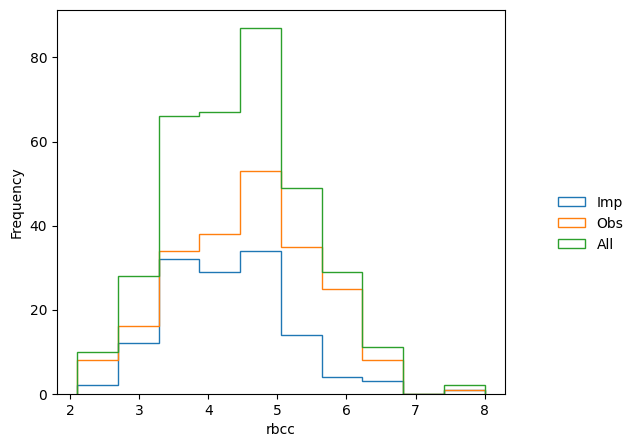

In [10]:

for col in numeric.columns:
    imp.plot_imputed_hist(col)

### Categorical

In [74]:
# Impute missing categorical
# --> to do does this make sense? or should we also do multiple imputation? if so, how?

from sklearn.impute import SimpleImputer
# For categorical columns, use the most frequent value imputation method
categorical_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
categorical_imputed = categorical.copy()
categorical_imputed[categorical.columns] = categorical_imputer.fit_transform(categorical)

categorical_imputed

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...
344,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
345,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
346,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
347,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


rbc 	 ['normal' 'abnormal']
pc 	 ['normal' 'abnormal']
pcc 	 ['notpresent' 'present']
ba 	 ['notpresent' 'present']
htn 	 ['yes' 'no']
dm 	 ['yes' 'no']
cad 	 ['no' 'yes']
appet 	 ['good' 'poor']
pe 	 ['no' 'yes']
ane 	 ['no' 'yes']
class 	 ['ckd' 'notckd']


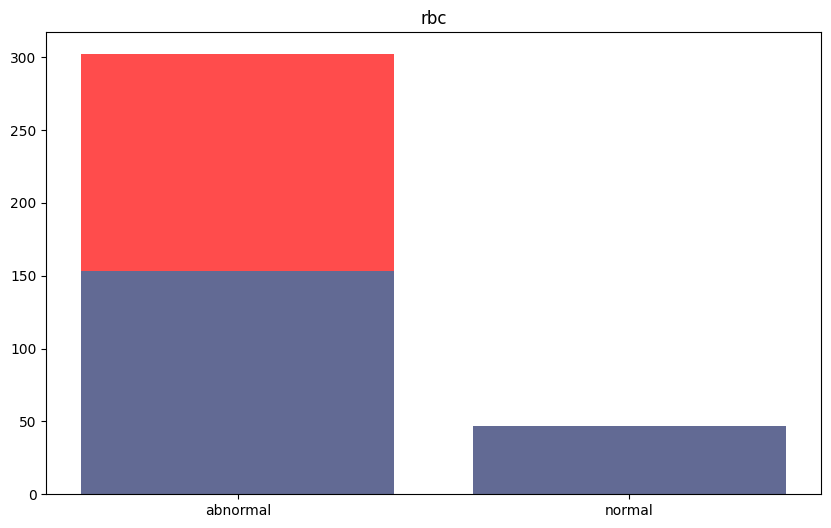

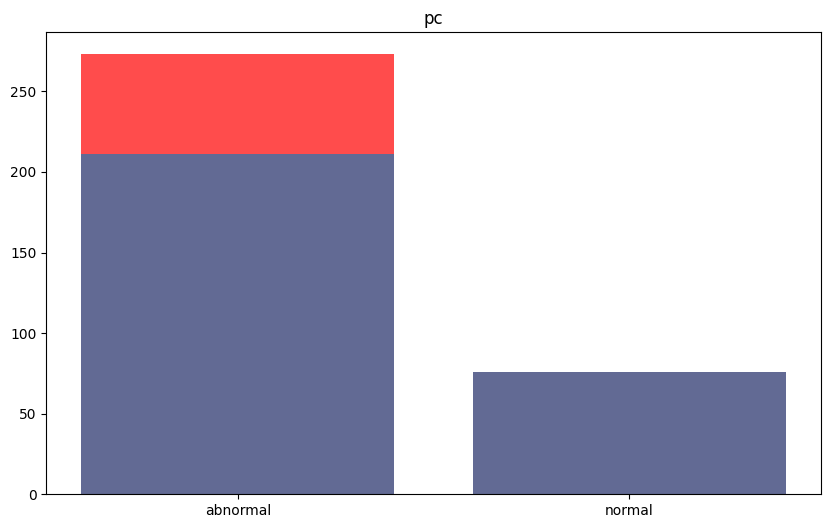

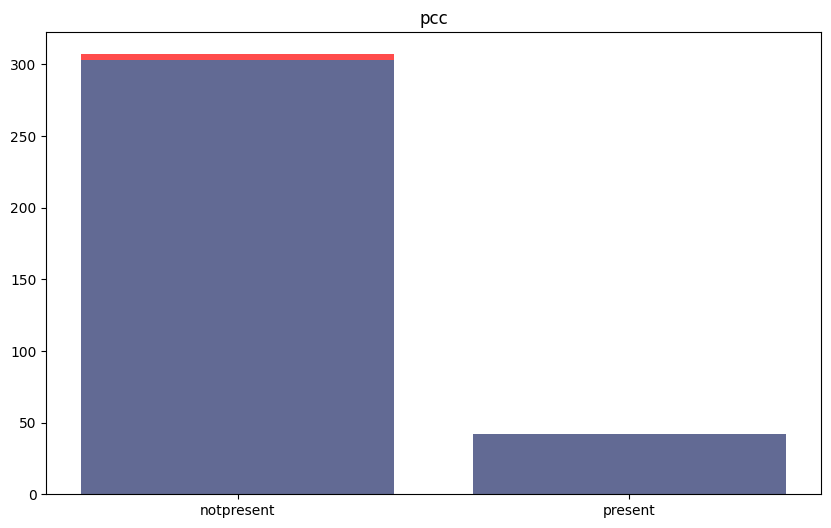

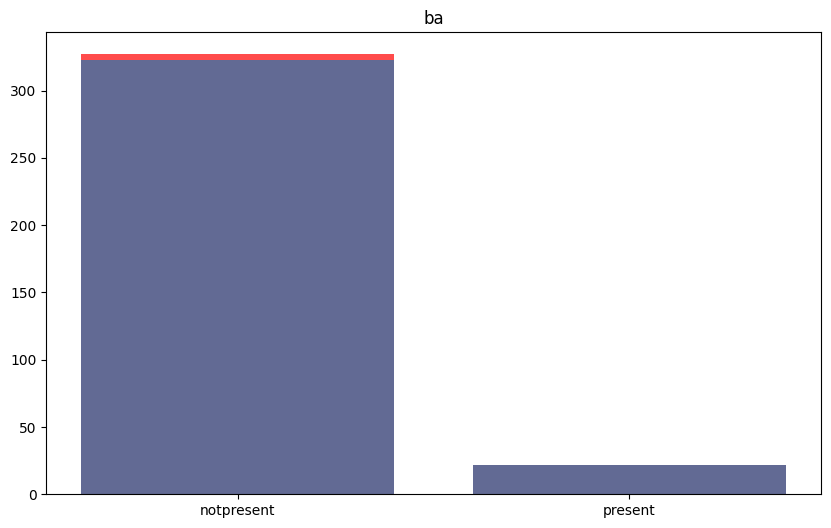

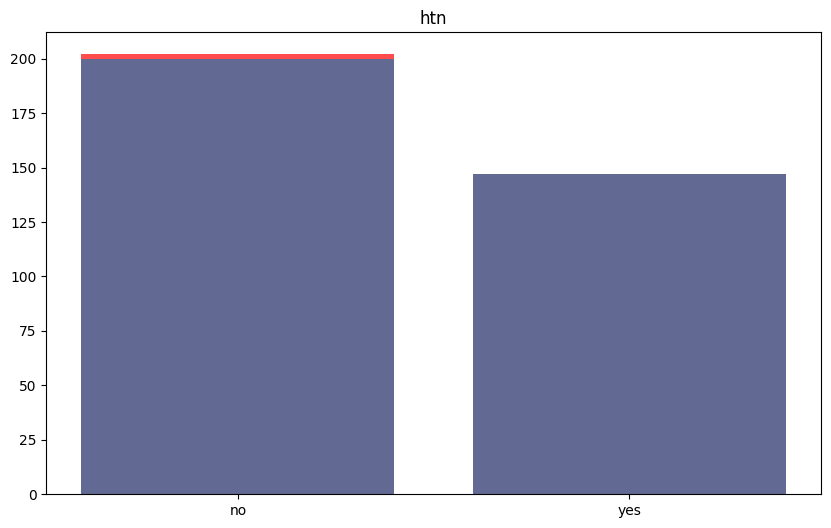

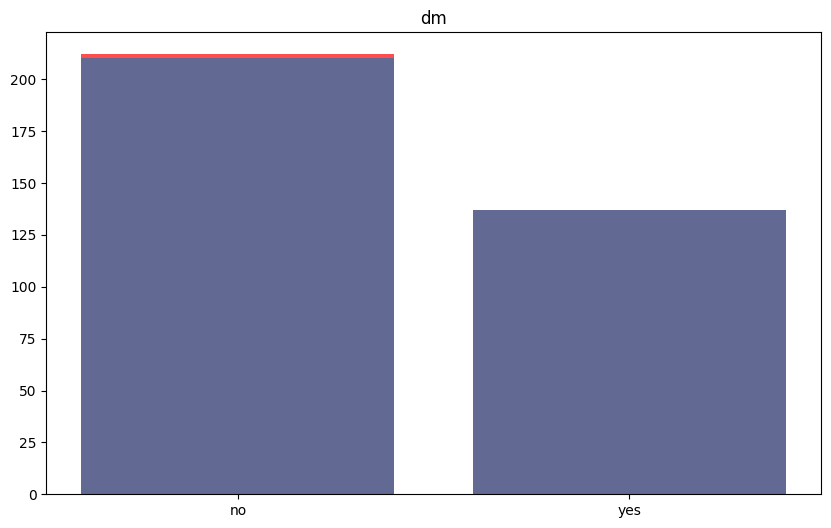

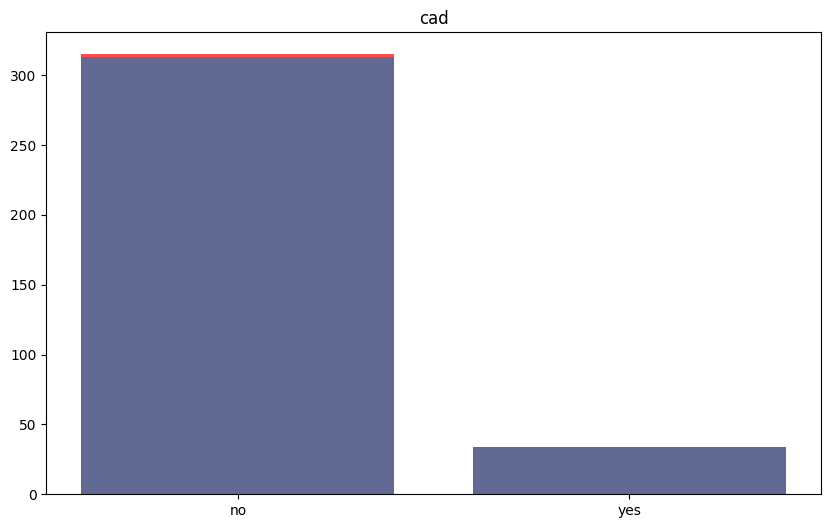

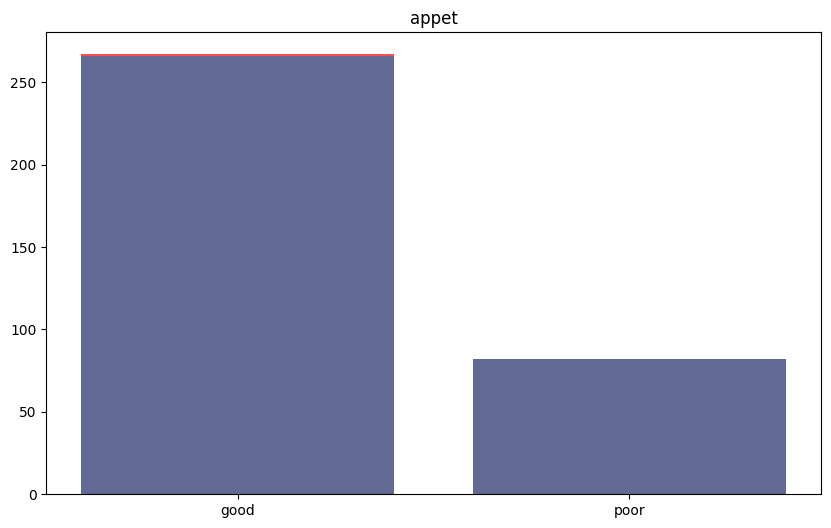

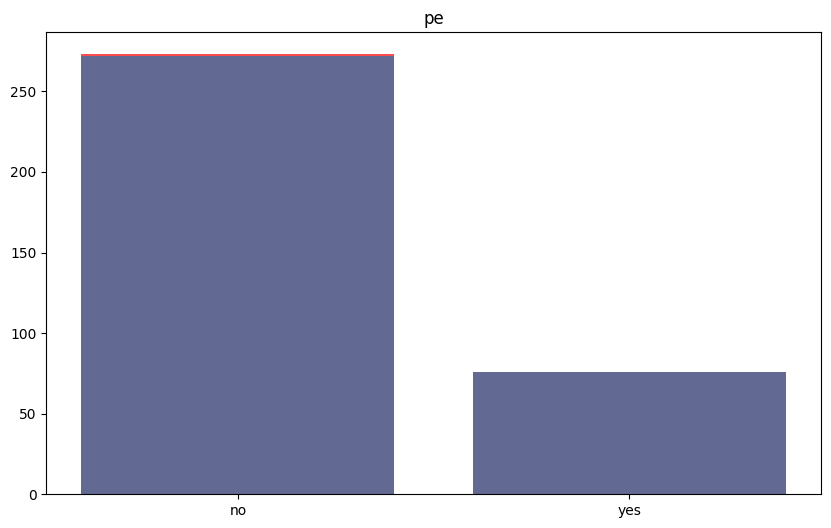

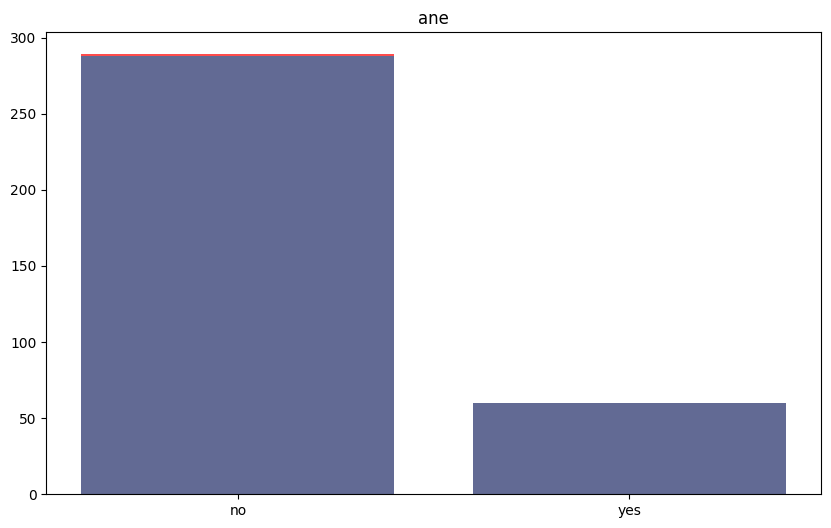

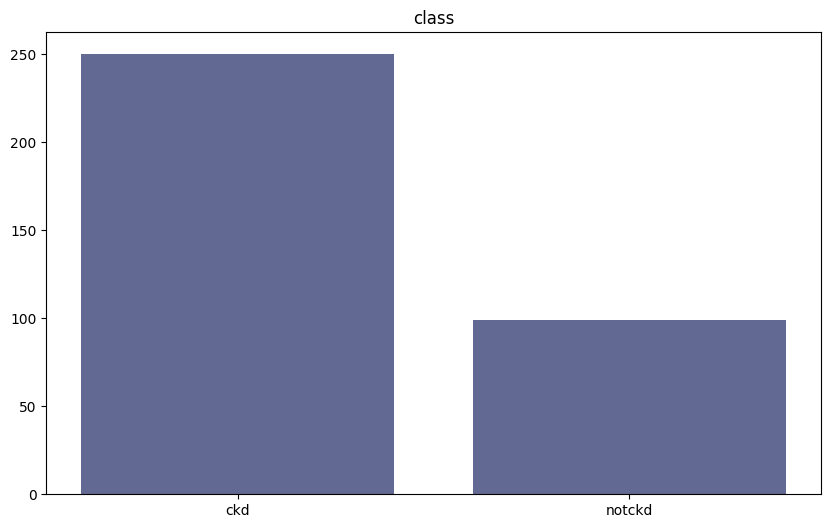

In [75]:
for col in categorical_imputed.columns:
    print(col, '\t',categorical_imputed[col].unique())
    categories = np.unique(categorical_imputed[col])

    original_counts = categorical[col].value_counts()

    # Count the occurrences of each category in the imputed DataFrame
    imputed_counts = categorical_imputed[col].value_counts()
    plt.figure(figsize=(10, 6))
    plt.bar(categories, imputed_counts, label='Imputed', alpha=0.7, color='red')
    plt.bar(categories, original_counts, label='Original', alpha=0.7)
    plt.title(col)

# Problems: how to deal with categorical columns?

## Save to csv

In [65]:
df[categorical.columns] = categorical_imputed
df[numeric.columns] = numeric_imputed
df.to_csv('preprocessed/df_imputed.csv', index=False)  
df_check = pd.read_csv('preprocessed/df_imputed.csv')
print_nr_none(df_check)


column 	 total 	 none 	 ratio
age 	 349 	 0 	 0.0
bp 	 349 	 0 	 0.0
sg 	 349 	 0 	 0.0
al 	 349 	 0 	 0.0
su 	 349 	 0 	 0.0
rbc 	 349 	 0 	 0.0
pc 	 349 	 0 	 0.0
pcc 	 349 	 0 	 0.0
ba 	 349 	 0 	 0.0
bgr 	 349 	 0 	 0.0
bu 	 349 	 0 	 0.0
sc 	 349 	 0 	 0.0
sod 	 349 	 0 	 0.0
pot 	 349 	 0 	 0.0
hemo 	 349 	 0 	 0.0
pcv 	 349 	 0 	 0.0
wbcc 	 349 	 0 	 0.0
rbcc 	 349 	 0 	 0.0
htn 	 349 	 0 	 0.0
dm 	 349 	 0 	 0.0
cad 	 349 	 0 	 0.0
appet 	 349 	 0 	 0.0
pe 	 349 	 0 	 0.0
ane 	 349 	 0 	 0.0
class 	 349 	 0 	 0.0
